<a href="https://colab.research.google.com/github/Karansaini260/Bird-Species-Prediction/blob/main/Bird_Species_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project we will create a Convolutional Neural Network which will be able to predict species of the bird.We will use different layers and other hyperparameters for building,training and testing this multiclass classification model.We will using keras for project.

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


First we will mount our google drive on colab so that we can use the dataset directly from our drive.For this you first need to upload data on your drive and then mount the drive on colab.

In [ ]:
#After executing the cell above,Drive files will be present in "content/drive/My drive".
!ls "/content/drive/My Drive"

'ABC123, XYZ001'
'Activation Functions in Machine Learning.gdoc'
'App Script.txt'
'Backpropagation: Explained.gdoc'
'Bird Speciees Dataset'
'Colab Notebooks'
 CreditCardFraud.ipynb
 Data.gsheet
'Data Science Cheat Sheet PDF Download.pdf'
'Drive Creator.gsheet'
'Drive Creator - Sheet1.csv'
'Gradient Descent in Machine Learning.gdoc'
 IMG_20240827_195202.jpg
'instagram_profiles_sample - Instagram.csv'
'instagram_profiles_sample - Instagram.gsheet'
'interview ques(DS (1).gdoc'
'interview ques(DS.gdoc'
 jsconfig.json
'Karan saini resume.pdf'
 next.config.mjs
 output.csv
 package.json
 package-lock.json
 postcss.config.js
 Potato___Early_blight
 public
'PW TASK.ipynb'
'python JD (1).rtf.gdoc'
'python JD.rtf.gdoc'
 PYTHONJDTBI.rtf.gdoc
'PyTorch Notes and Keyword Explanations.gdoc'
 README.md
'Resume (1).gdoc'
'Resume (2).gdoc'
'Resume (3).gdoc'
'Resume (4).gdoc'
'Resume (5).gdoc'
 Resume.gdoc
'Resume update.pdf'
 src
 tailwind.config.js
'Untitled spreadsheet.gsheet'
 utils
'youtube_channels_

After mounting our drive and will locate the folder where our data is stored to use colab notebook.Here you can see that all the folders I have in my drive and 'Bird Species Dataset' contains the images that we will work on.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
import cv2
import random
from keras.preprocessing import image
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import img_to_array,array_to_img

We will start by importing some required libraries.

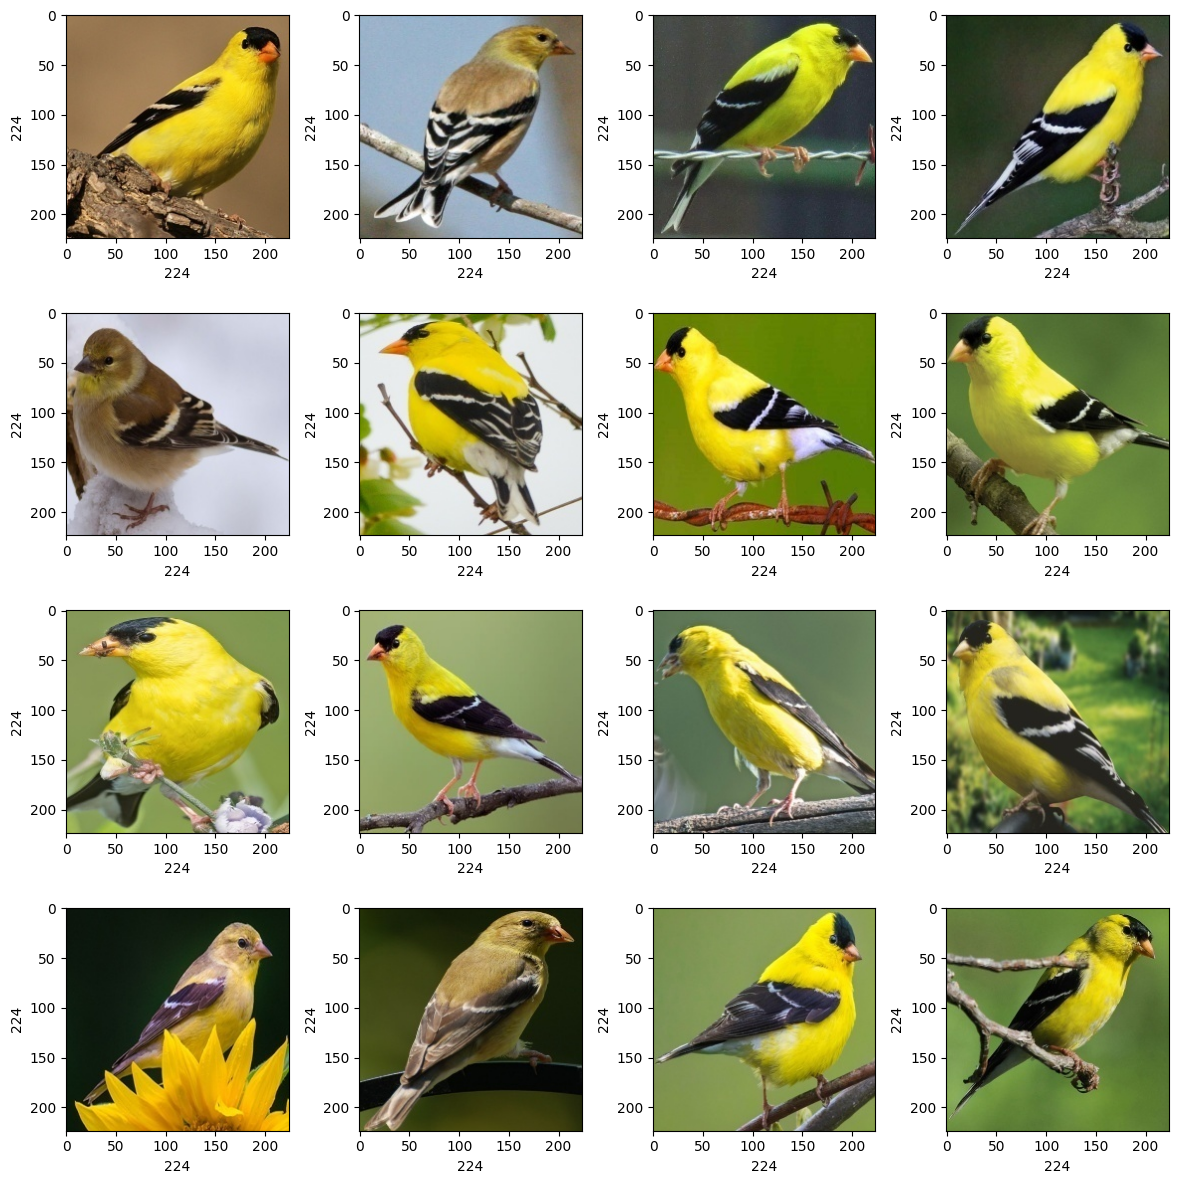

In [ ]:
# Plotting l2 image to check dataset.
plt.figure(figsize=(12,12))
path = '/content/drive/My Drive/Bird Speciees Dataset/AMERICAN GOLDFINCH'
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path + '/' + random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

Let's visualize some of the bird images that we working on.Also we will observe x and y dimentions of the image.

In [ ]:
dir = '/content/drive/My Drive/Bird Speciees Dataset'
root_dir = listdir(dir)
image_list, label_list = [],[]

Setting the root directory for the dataset and storing all the folders name of the dataset.We will also create 2 empty list for image and labels.

In [ ]:
#Reading and converting image and numpy array
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = cv2.imread(image_path)
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

Now we will read all the images and convert it into array and appending the list created above with the image and its label.

In [ ]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

,count
0,
AMERICAN GOLDFINCH,143
EMPEROR PENGUIN,139
DOWNY WOODPECKER,137
FLAMINGO,132
CARMINE BEE-EATER,131
BARN OWL,129


Check the class imbalance.

In [ ]:
num_classes = len(label_counts)
num_classes

6

Next we will find out the number of classes that we will be working on.

In [ ]:
image_list[0].shape

(224, 224, 3)

Check the shape of single image.

In [ ]:
label_list = np.array(label_list)
label_list.shape

(811,)

Checking the shape of image labels which will equal to the number of images we are going to work with.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(image_list,label_list,test_size=0.2,random_state=42)

Now we will split the data into training and testing using train_test_split() of sklearn.

In [ ]:
x_train = np.array(x_train,dtype=np.float16) / 225.0
x_test = np.array(x_test,dtype=np.float16) / 225.0
x_train = x_train.reshape(-1,224,224,3)
x_test = x_test.reshape(-1,224,224,3)

Next we will normalize the images by dividing them with 225 .Also, we will reshape x_train and x_test

In [ ]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']


Next we will use label binarizer to one hot encoded our y data.We will also print the sequence of the classes.

In [ ]:
#Splitting the training data set into training and validation data sets.
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2)

Now we will split the training data to validation and training data.

In [ ]:
model = Sequential()
model.add(Conv2D(8,(3,3),padding="same",input_shape=(224,224,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(16,(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dense(num_classes,activation="softmax"))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 74, 74, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 37, 37, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 37, 37, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       331,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 338,038 (1.29 MB)

 Trainable params: 338,038 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

Now we will create a network architecture for the model.We have used different types of layers according to their features namely Conv_2D(It is used to create a convulational Kernel that is convolved with the input layer to produce a output tensor),max_pooling_2D(It is a downsampling technique which takes out the maximum value over the window define the poolsize),flatten(it flatten the input and creates a 1D output),Dense(Dense layer produce the output as the dot product of input and kernel).In the last layer we will use softmax as the activation function because of multi-class classification problem.

In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer=Adam(0.0005),metrics=['accuracy'])

While compiling the model we need to set the type of loss which will be Categorical CrossEntropy for our model along with this we also need to set the optimizer and the metrics respectively.

In [ ]:
#Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_val,y_val))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.1658 - loss: 1.8238 - val_accuracy: 0.1346 - val_loss: 1.8105
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.2123 - loss: 1.7257 - val_accuracy: 0.2788 - val_loss: 1.7150
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.3508 - loss: 1.6872 - val_accuracy: 0.2115 - val_loss: 1.6826
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.3327 - loss: 1.6187 - val_accuracy: 0.3269 - val_loss: 1.6322
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.3748 - loss: 1.5781 - val_accuracy: 0.2596 - val_loss: 1.6069
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.3725 - loss: 1.5089 - val_accuracy: 0.4231 - val_loss: 1.5292
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.4039 - loss: 1.4890 - val_accuracy: 0.4423 - val_loss: 1.5090
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.4522 - loss: 1.4501 - val_accuracy: 0.3269 - val_loss: 1.5208
Epoch 9/

Fitting the model with the data and finding out the accuracy at each epoch to see how our model is learning.Now we will train our model on 50 epochs and a batch size of 128.You can try using more number to increase accuracy but here we can see that the model has already reached a very high accuracy so we don't need to run it for more.During each epoch we can see how the model is performing by viewing the training and validation accuracy.



In [ ]:
model.save("/content/drive/My Drive/bird_species.h5")

Now we will save the model in h5 format to use it later for prediction.

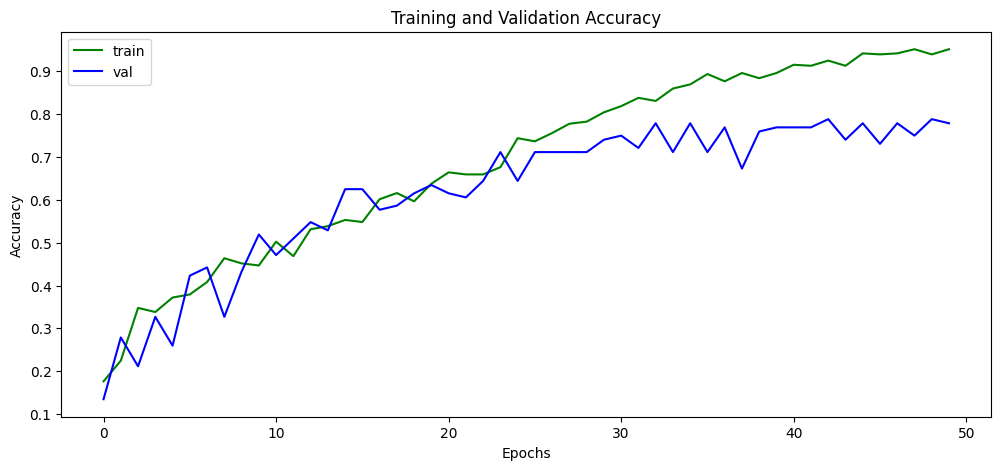

In [ ]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()

Next we will plot the accuracy of the model for the training history.

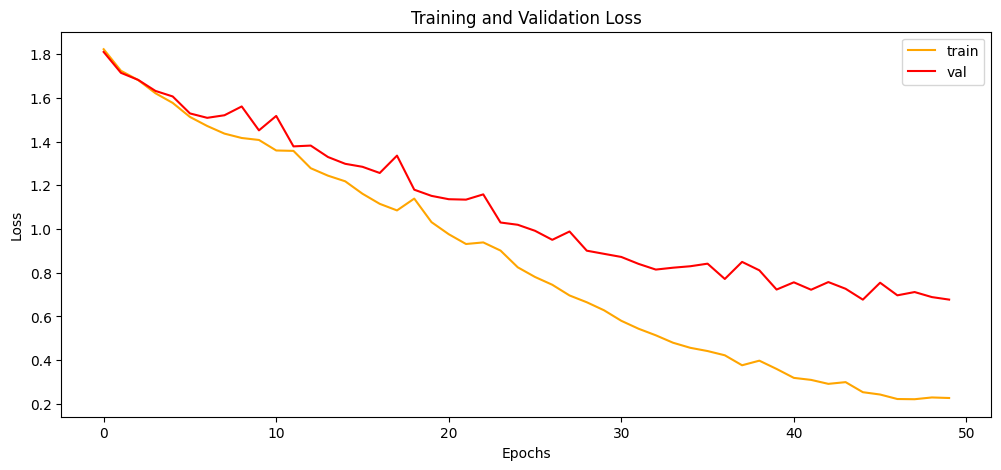

In [ ]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='orange', label='Training Loss')
plt.plot(history.history['val_loss'], color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

Here we will plot the loss of the model for the training history.

In [ ]:
# Calculating test accuracy
scores = model.evaluate(x_test,y_test)
print(f"Test Accuracy: {scores[1]*100}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 331ms/step - accuracy: 0.7572 - loss: 0.9777
Test Accuracy: 74.23312664031982


Evaluting the model to know the accuracy of the model on the test data.

In [ ]:
#Storing predictions
y_pred = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 337ms/step


Here we are storing prediction on test data.

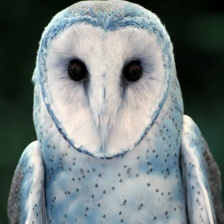

In [ ]:
#Plotting image to compare
img = array_to_img(x_test[5])
img

Visualizing one of the image which we will be further used for prediction.

In [ ]:
# Finding max value from prediction list and comparing original value vs predicted
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[5])])
print("Predicted : ",labels[np.argmax(y_pred[5])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']
Originally :  BARN OWL
Predicted :  FLAMINGO


Now we will create list of labels using object of label binarizer.We will print that list and finally we will print out the prediction and the original label of the imagwee we visualized above using argmax().

# Conclusion :

We started with loading the dataset into google colab using google drive and visualizing the images. Normalizing is an important step when working with any type of dataset.After that we created a CNN Model which is further used for predicting the bird species using the image supplied to model.

# Scope

This project can be used for educational purpose to get a better understanding of how to create networj architecture for a CNN model.You can further hyper parameter tune this model to reach a higher accuracy.It can be used by bird sancturies to identify different types of birds.